In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Stratified CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

In [45]:
#Metircs
def metrics(model, data, target, cv=skf):
    accuracy = cross_val_score(model, data, target, cv=skf, scoring = 'accuracy').mean()
    precision = cross_val_score(model, data, target, cv=skf, scoring = 'precision').mean()
    recall = cross_val_score(model, data, target, cv=skf, scoring = 'recall').mean()
    f1 = cross_val_score(model, data, target, cv=skf, scoring = 'f1').mean()
    balanced = cross_val_score(model, data, target, cv=skf, scoring = 'balanced_accuracy').mean()
    print(f'Accuracy : \t\t{accuracy}')
    print(f'Precision : \t\t{precision}')
    print(f'Recall : \t\t{recall}')
    print(f'F1 : \t\t\t{f1}')
    print(f'Balanced Accuracy : \t{balanced}')

In [59]:
#MinMaxScaler
def minMax(data):
    scaler = MinMaxScaler()
    scaler.fit(data)
    scale = scaler.transform(data)

    scaled_df = pd.DataFrame(scale)
    
    return scaled_df

In [72]:
#SMOTE
def smote(data, target):
    smote = SMOTE(random_state=0)
    X_over, y_over = smote.fit_resample(data, target)
    return X_over, y_over

# DILI

1    54.447439
0    45.552561
Name: DILI, dtype: float64


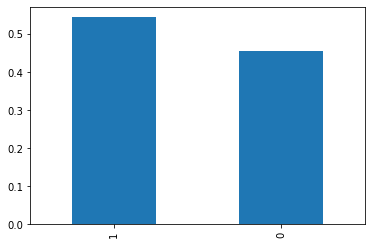

In [46]:
df_raw = pd.read_csv('DILI/final/DILI_GSD.csv') # Need to input Binary class Data
df_raw.DILI.value_counts(normalize=True).plot(kind='bar')
print(df_raw.DILI.value_counts(normalize=True)*100)

df = df_raw.iloc[:, 3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [51]:
model = LogisticRegression()
metrics(model, X, y)

Accuracy : 		0.5943447372398851
Precision : 		0.6041911354165836
Recall : 		0.7408971873618339
F1 : 			0.6653860773789165
Balanced Accuracy : 	0.5799959769906764


In [52]:
model = LGBMClassifier()
metrics(model, X, y)

Accuracy : 		0.7147306897767924
Precision : 		0.7215341753193683
Recall : 		0.7755433119069484
F1 : 			0.7473243393455593
Balanced Accuracy : 	0.7087856539049935


In [53]:
model = RandomForestClassifier()
metrics(model, X, y)

Accuracy : 		0.720114878822996
Precision : 		0.7209510958650718
Recall : 		0.7977927422371867
F1 : 			0.755091948726458
Balanced Accuracy : 	0.7152715019391342


In [54]:
model = KNeighborsClassifier()
metrics(model, X, y)

Accuracy : 		0.6235410893334006
Precision : 		0.6419842223461327
Recall : 		0.697993402033806
F1 : 			0.6685925026878486
Balanced Accuracy : 	0.616245396329784


In [55]:
model = SVC()
metrics(model, X, y)

Accuracy : 		0.5539063838363479
Precision : 		0.5501054867420543
Recall : 		0.9917457402305887
F1 : 			0.7076732374783331
Balanced Accuracy : 	0.511158438080958


## Normalization - MinMaxScaling

In [63]:
X_scaled = minMax(X)

In [64]:
model = LogisticRegression()
metrics(model, X_scaled, y)

Accuracy : 		0.6769960195495541
Precision : 		0.6978907497754492
Recall : 		0.7177941026425875
F1 : 			0.7075385084025919
Balanced Accuracy : 	0.673004742878627


In [65]:
model = LGBMClassifier()
metrics(model, X_scaled, y)

Accuracy : 		0.7079860936161636
Precision : 		0.7171196461602578
Recall : 		0.7656293575485494
F1 : 			0.740173802615773
Balanced Accuracy : 	0.7023581602160149


In [66]:
model = RandomForestClassifier()
metrics(model, X_scaled, y)

Accuracy : 		0.7183181337229808
Precision : 		0.715075855588027
Recall : 		0.7969969050777131
F1 : 			0.7571152389692303
Balanced Accuracy : 	0.7122300955610148


In [67]:
model = KNeighborsClassifier()
metrics(model, X_scaled, y)

Accuracy : 		0.6684597168337785
Precision : 		0.6974564589540957
Recall : 		0.6905621875318845
F1 : 			0.6937903847270817
Balanced Accuracy : 	0.6663219170600942


In [68]:
model = SVC()
metrics(model, X_scaled, y)

Accuracy : 		0.7093475084395626
Precision : 		0.6999470875907022
Recall : 		0.8184641023024861
F1 : 			0.7542714453856151
Balanced Accuracy : 	0.698675059491486


## OverSampling - SMOTE

In [78]:
X_over, y_over = smote(X_scaled,y)

In [79]:
model = LogisticRegression()
metrics(model, X_over, y_over)

Accuracy : 		0.7009159069608929
Precision : 		0.7103870846560374
Recall : 		0.6806516341869877
F1 : 			0.6947103447729541
Balanced Accuracy : 	0.7008825630037752


In [80]:
model = LGBMClassifier()
metrics(model, X_over, y_over)

Accuracy : 		0.740516315924001
Precision : 		0.7385491205638128
Recall : 		0.7458422609937762
F1 : 			0.7417122815331352
Balanced Accuracy : 	0.7404720606740809


In [81]:
model = RandomForestClassifier()
metrics(model, X_over, y_over)

Accuracy : 		0.7446374712447815
Precision : 		0.7344505435834932
Recall : 		0.7664796109240555
F1 : 			0.7573048840603654
Balanced Accuracy : 	0.743791449852056


In [86]:
model = KNeighborsClassifier()
metrics(model, X_over, y_over)

Accuracy : 		0.6394351197069097
Precision : 		0.7170460990014569
Recall : 		0.46201067918239636
F1 : 			0.5614544668325201
Balanced Accuracy : 	0.6394075434479475


In [ ]:
model = SVC()
metrics(model, X_over, y_over)